In [1]:
from functions import kddDfEncode
from functions import kddPearsonCorr
from functions import saveList
from functions import retainFeatures
import pandas as pd
import numpy as np




dataset_file = 'datasets/kddcup.data_10_percent_corrected.csv'
feature_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = feature_names.iloc[:,0].values

kdd = pd.read_csv(dataset_file, names=kdd_names)


In [2]:
kddEncoded = kddDfEncode(kdd)

In [ ]:
#kddPearsonCorr(kddEncoded)

In [56]:
kddSelected = retainFeatures(kddEncoded,2) #retains top N features via pearson correlation list

In [57]:
kddSelected

,src_bytes,count,attack_type
0,181,8,normal.
1,239,8,normal.
2,235,8,normal.
3,219,6,normal.
4,217,6,normal.
...,...,...,...
494016,310,4,normal.
494017,282,6,normal.
494018,203,6,normal.
494019,291,6,normal.


In [18]:
X = kddSelected.drop(labels=['attack_type'], axis=1)
Y = kddSelected['attack_type']

In [19]:
from sklearn import preprocessing
x = X.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=['src_bytes','count'])

In [32]:
Y.unique()

array(['normal.', 'U2R', 'dos', 'R2L', 'probe'], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,
    test_size=0.95,
    random_state=42)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np


In [36]:
#rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)

kddSelectedSamp = kddSelected.sample(frac=1, random_state=42)

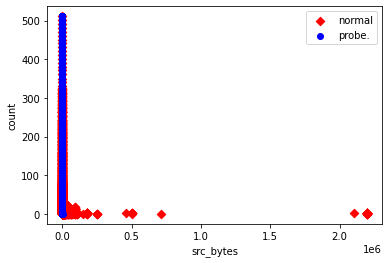

In [61]:
plt.scatter(kddSelected['src_bytes'][(kddSelected.attack_type == 'normal.') | (kddSelected.attack_type == 'normal.')],
            kddSelected['count'][(kddSelected.attack_type == 'normal') | (kddSelected.attack_type == 'normal.')],
           marker='D',
           color='red',
           label='normal')
plt.scatter(kddSelected['src_bytes'][kddSelected.attack_type == 'probe'],
            kddSelected['count'][kddSelected.attack_type == 'probe'],
           marker='o',
           color='blue',
           label='probe.')
plt.xlabel('src_bytes')
plt.ylabel('count')
plt.legend()
plt.show()



In [51]:
outlier = kddSelected['src_bytes'][kddSelected.attack_type == 'probe'].max()

In [58]:
kddSelected = kddSelected[kddSelected.src_bytes != outlier]